In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import stats
from sklearn.linear_model import LinearRegression
import plotly.express as px
from scipy.stats import normaltest
import requests
from bs4 import BeautifulSoup
from scipy.stats import pearsonr
import ast
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import nltk
from snowballstemmer import TurkishStemmer
from nltk import word_tokenize
from googletrans import Translator
import re 

In [2]:
df_comment=pd.read_csv("Trendyol_Computer_Comments.csv")
df_comment

Original Link  \
0     https://www.trendyol.com/casper/nirvana-c370-4...   
1     https://www.trendyol.com/lenovo/nb-v15-82yu012...   
2     https://www.trendyol.com/zeiron/zgx25-ryzen-5-...   
3     https://www.trendyol.com/lenovo/ideapad3-intel...   
4     https://www.trendyol.com/asus/vivobook-15-inte...   
...                                                 ...   
5611  https://www.trendyol.com/lenovo/thinkpad-t14-g...   
5612  https://www.trendyol.com/hp/victus-16-ryzen-7-...   
5613  https://www.trendyol.com/hp/probook-450-g9-i5-...   
5614  https://www.trendyol.com/lenovo/v15-g3-intel-c...   
5615  https://www.trendyol.com/hp/255-g8-amd-ryzen-5...   

                                           Comment Link  \
0     https://www.trendyol.com/casper/nirvana-c370-4...   
1     https://www.trendyol.com/lenovo/nb-v15-82yu012...   
2     https://www.trendyol.com/zeiron/zgx25-ryzen-5-...   
3     https://www.trendyol.com/lenovo/ideapad3-intel...   
4     https://www.trendyol.com/asus/vivobook-15-inte...   
...                                                 ...   
5611  https://www.trendyol.com/lenovo/thinkpad-t14-g...   
5612  https://www.trendyol.com/hp/victus-16-ryzen-7-...   
5613  https://www.trendyol.com/hp/probook-450-g9-i5-...   
5614  https://www.trendyol.com/lenovo/v15-g3-intel-c...   
5615  https://www.trendyol.com/hp/255-g8-amd-ryzen-5...   

                                               Yorumlar  
0     ["daha √ßok yeni olduƒüu i√ßin performansƒ±na dair...  
1     ['√ßok begendim ikincisini sipari≈ü verecem tavs...  
2     ['Oƒülum i√ßin aldƒ±m harika bir √ºr√ºn tavsiye ede...  
3     ['sorunsuz geldi te≈üekk√ºr ederim satƒ±cƒ±ya karn...  
4     ['Kƒ±zƒ±ma aldƒ±m √ßok memnun', '12 ya≈üƒ±ndaki orta...  
...                                                 ...  
5611                                   ['Yorum Yoktur']  
5612                                   ['Yorum Yoktur']  
5613                                   ['Yorum Yoktur']  
5614                                   ['Yorum Yoktur']  
5615                                   ['Yorum Yoktur']  

[5616 rows x 3 columns]

In [8]:
df=pd.read_csv("Trendyol_Clear_Data_Computer_Price.csv")
df

Brand                                              Model     Price  \
0     CASPER  Nirvana C370.4020-4C00B Intel Celeron N4020 4G...   8750.00   
1     LENOVO  NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...  13499.00   
2     Zeiron  Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...  18299.00   
3     LENOVO  IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....  11005.00   
4       ASUS  Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...  15498.00   
...      ...                                                ...       ...   
5611  LENOVO  Ryzen 7 Pro 5850u 48gb 2tb Ssd 14" W11p 20xls3...  43399.00   
5612      HP  24GB 4TB SSD RTX4070/8GB 144HZ 16.1" FHD FDOS ...  75716.13   
5613      HP  64GB 256GB SSD 15.6" FHD W11PRO 6S6Z1EA & PER4...  39655.09   
5614  LENOVO  V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...  24464.30   
5615      HP  64gb 512gb Ssd 15.6 Fhd Windows11pro Ta≈üƒ±nabil...  24999.99   

      Rating                                               Link  \
0        4.2  https://www.trendyol.com/casper/nirvana-c370-4...   
1        4.5  https://www.trendyol.com/lenovo/nb-v15-82yu012...   
2        4.6  https://www.trendyol.com/zeiron/zgx25-ryzen-5-...   
3        3.8  https://www.trendyol.com/lenovo/ideapad3-intel...   
4        4.5  https://www.trendyol.com/asus/vivobook-15-inte...   
...      ...                                                ...   
5611     0.0  https://www.trendyol.com/lenovo/thinkpad-t14-g...   
5612     0.0  https://www.trendyol.com/hp/victus-16-ryzen-7-...   
5613     0.0  https://www.trendyol.com/hp/probook-450-g9-i5-...   
5614     5.0  https://www.trendyol.com/lenovo/v15-g3-intel-c...   
5615     0.0  https://www.trendyol.com/hp/255-g8-amd-ryzen-5...   

      Favori Number  Rush Delivery  Free Cargo   ƒ∞≈ülemci Tipi  \
0           60500.0              0           1  Intel Celeron   
1           18500.0              1           1    AMD Ryzen 5   
2           30300.0              1           1    AMD Ryzen 5   
3            4354.0              1           1  Intel Core i3   
4            7974.0              1           1  Intel Core i5   
...             ...            ...         ...            ...   
5611            0.0              1           1    AMD Ryzen 7   
5612            0.0              0           1    AMD Ryzen 7   
5613            0.0              0           1  Intel Core i5   
5614            0.0              0           1  Intel Core i7   
5615            0.0              0           1    AMD Ryzen 5   

      Ram (Sistem Belleƒüi)  ...                 Garanti Tipi  \
0                      4.0  ...     Casper T√ºrkiye Garantili   
1                     16.0  ...     Lenovo T√ºrkiye Garantili   
2                     32.0  ...     Zeiron T√ºrkiye Garantili   
3                      8.0  ...     Lenovo T√ºrkiye Garantili   
4                      8.0  ...       Asus T√ºrkiye Garantili   
...                    ...  ...                          ...   
5611                  48.0  ...  Resmi Distrib√ºt√∂r Garantili   
5612                  24.0  ...         HP T√ºrkiye Garantili   
5613                  64.0  ...         HP T√ºrkiye Garantili   
5614                  24.0  ...     Lenovo T√ºrkiye Garantili   
5615                  64.0  ...  Resmi Distrib√ºt√∂r Garantili   

     Temel ƒ∞≈ülemci Hƒ±zƒ± (GHz) Maksimum ƒ∞≈ülemci Hƒ±zƒ± (GHz)  \
0                         1.1                         2.8   
1                         1.1                         2.8   
2                         3.6                         4.4   
3                         4.0                         4.0   
4                         1.3                         4.4   
...                       ...                         ...   
5611                      1.9                         4.4   
5612                      1.9                         5.0   
5613                      1.7                         4.4   
5614                      3.5                         4.2   
5615                      3.7  

In [9]:
df=df.drop_duplicates(subset='Link')

In [4]:
df_new=df_comment.drop_duplicates(subset='Comment Link')

In [5]:
df_new["Comments"] = df_new["Yorumlar"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

C:\Users\samet\AppData\Local\Temp\ipykernel_15108\29860784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Comments"] = df_new["Yorumlar"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [107]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

In [90]:
def clean_text(text):
    text = text.lower().strip()
    text = re.sub(r"([-?.!,/\"])", '', text)  # Temel noktalama temizliƒüi
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)  # Fazla bo≈üluklarƒ± temizle
    text = re.sub('\n\n', '', text)  # Gereksiz yeni satƒ±rlarƒ± temizle
    text = text.rstrip().strip()

    
    words = text.split()
    cleaned_words = [word for word in words if word not in stoplist]

    return " ".join(cleaned_words)

In [7]:
def cleand_text(text):
    text = text.lower().strip()
    text = re.sub(r"([-?.!,/\"])", '', text)  # Temel noktalama temizliƒüi
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)  # Fazla bo≈üluklarƒ± temizle
    text = re.sub('\n\n', '', text)  # Gereksiz yeni satƒ±rlarƒ± temizle
    text = text.rstrip().strip()
    return text

In [10]:
df_new["Brand"]=df["Brand"]
df_new["Model"]=df["Model"]
df_new["Rating"]=df["Rating"]
df_new["Favori Number"]=df["Favori Number"]
df_new["Price"]=df["Price"]

C:\Users\samet\AppData\Local\Temp\ipykernel_15108\4171377806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Brand"]=df["Brand"]
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\4171377806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Model"]=df["Model"]
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\4171377806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [14]:
df_new = df_new.reset_index(drop=True)

In [110]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from googletrans import Translator

# √áevirici ve analiz√∂r ba≈ülat
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    # Metni ƒ∞ngilizce'ye √ßevir
    translated_text = translator.translate(text, src="tr", dest="en").text
    
    # Sentiment analizi yap
    score = analyzer.polarity_scores(translated_text)
    
    # Compound deƒüerine g√∂re sƒ±nƒ±flandƒ±r
    if score['compound'] >= 0.05:
        sentiment = "Pozitif"
    elif score['compound'] <= -0.05:
        sentiment = "Negatif"
    else:
        sentiment = "N√∂tr"
    
    return sentiment, score

# Test metni
text = "Leptop √ßok k√∂t√º"
sentiment, score = get_sentiment(text)

print(f"Metin: {text}")
print(f"√áevrilen Metin: {translator.translate(text, src='tr', dest='en').text}")
print(f"Polarity Skorlarƒ±: {score}")
print(f"Sonu√ß: {sentiment}")

Metin: Leptop √ßok k√∂t√º
√áevrilen Metin: Laptop is so bad
Polarity Skorlarƒ±: {'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.6696}
Sonu√ß: Negatif


In [13]:
result={"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
cleaned_texts = [cleand_text(yorum) for yorum in df_new["Comments"][100]]
tek_metin = " ".join(cleaned_texts)
sentiment, score = get_sentiment(tek_metin)
print(f"Metin: {tek_metin}")
print(f"√áevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
print(f"Polarity Skorlarƒ±: {score}")
print(f"Sonu√ß: {sentiment}")
result["Text"].append(tek_metin)
result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
for key,value in score.items():
    if key=="neg":
        result["Negatif"].append(value)
    elif key=="neu":
        result["Notr"].append(value)
    elif key=="pos":
        result["Positif"].append(value)
    else:
        result["Compound"].append(value)
result["Sentiment"].append(sentiment)

res=pd.DataFrame(result)
res


Metin: bir aydƒ±r kullanƒ±yor oƒülum gayet memnun te≈üekk√ºrler e≈üimi doƒüum g√ºn√º hediyesi aldƒ±m √ßok g√ºzel tek kelime ile m√ºkemmel hi√ßbir sorunu yok gayet korunaklƒ± geldi gayet saƒülam ve g√ºvenilir te≈üekk√ºr ederiz alalƒ± bir ay oldu ben √ßok memnunum hƒ±zƒ± m√ºkemmel √ßok g√ºzel paketleme ve kargonun hƒ±zƒ± inanƒ±lmaz √ßok m√ºkemmel kalite performans √ßok iyi g√ºzel bilgisayarcƒ±ya kurdurdum √ßocuƒüum i√ßin aldƒ±m olduk√ßa memnun sorun √ßƒ±kmadƒ± casperƒ± tebrik ederim bu laptop olmu≈ü on numara be≈ü yƒ±ldƒ±z monsterdan daha iyi alƒ±cak arkada≈ülar ka√ßƒ±rmayƒ±n yeni yƒ±l zammƒ±ndan √∂nce kapmaya bakƒ±n 32 ram daha ekleyin laptobunuzu doya doya 45 sene kullanƒ±n ü§© fiyat performans √ºr√ºn√º tavsiye ederim harika bilgisayar kesinlikle alabilirsiniz √ßok g√ºzel bir √ºr√ºn fiyat performans √ºt√ºn√º tavsiye ederim √ºr√ºn √ßok k√∂t√º bilgisayar baya iyi her kese tavsiye ederim volorantta 320 √ºzeri fps aldƒ±m d√ºs√ºk ayarlarda harika bir bilgisayar cok beƒüendik ba≈üarƒ±lƒ± bi

Text  \
0  bir aydƒ±r kullanƒ±yor oƒülum gayet memnun te≈üekk...   

                                     Translated Text  Negatif   Notr  Positif  \
0  He has been using it for a month, my son is ve...    0.049  0.625    0.326   

   Compound Sentiment  
0    0.9974   Pozitif

In [ ]:
data={"Brand":[],"Model":[],"Price":[],"Favori Number":[],"Rating":[],"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}

for i in range(len(df_new["Comments"][:100])):
    data["Brand"].append(df_new["Brand"][i])
    data["Model"].append(df_new["Model"][i])
    data["Price"].append(df_new["Price"][i])
    data["Favori Number"].append(df_new["Favori Number"][i])
    data["Rating"].append(df_new["Rating"][i])
    
    cleaned_texts = [clean_text(yorum) for yorum in df_new["Comments"][i]]
    tek_metin = " ".join(cleaned_texts)
    sentiment, score = get_sentiment(tek_metin)
        
        
    translated_text = translator.translate(tek_metin, src='tr', dest='en').text

        
    data["Text"].append(tek_metin)
    data["Translated Text"].append(translated_text)
    data["Negatif"].append(score["neg"])
    data["Notr"].append(score["neu"])
    data["Positif"].append(score["pos"])
    data["Compound"].append(score["compound"])
    data["Sentiment"].append(sentiment)

df_main=pd.DataFrame(data)
df_main 

In [ ]:
data = {
    "Brand": [],
    "Model": [],
    "Price": [],
    "Favori Number": [],
    "Rating": [],
    "Text": [],
    "Translated Text": [],
    "Negatif": [],
    "Notr": [],
    "Positif": [],
    "Compound": [],
    "Sentiment": []
}


for i in range(1000,2794):
    try:
        # Temel bilgileri ekleyelim
        data["Brand"].append(df_new["Brand"][i])
        data["Model"].append(df_new["Model"][i])
        data["Price"].append(df_new["Price"][i])
        data["Favori Number"].append(df_new["Favori Number"][i])
        data["Rating"].append(df_new["Rating"][i])

        # 1Ô∏è **Metni temizle**
        try:
            cleaned_texts = [cleand_text(yorum) for yorum in df_new["Comments"][i]]
            tek_metin = " ".join(cleaned_texts)
        except Exception as e:
            print(f"Temizleme hatasƒ±, indeks: {i}, Hata: {e}")
            tek_metin = np.nan  # Hata olursa NaN ekle

        data["Text"].append(tek_metin)

        #  **Duygu Analizi Yap**
        if isinstance(tek_metin, str) and tek_metin.strip():
            try:
                sentiment, score = get_sentiment(tek_metin)
                data["Negatif"].append(score["neg"])
                data["Notr"].append(score["neu"])
                data["Positif"].append(score["pos"])
                data["Compound"].append(score["compound"])
                data["Sentiment"].append(sentiment)
            except Exception as e:
                print(f"Duygu analizi hatasƒ±, indeks: {i}, Hata: {e}")
                data["Negatif"].append(np.nan)
                data["Notr"].append(np.nan)
                data["Positif"].append(np.nan)
                data["Compound"].append(np.nan)
                data["Sentiment"].append(np.nan)
        else:
            data["Negatif"].append(np.nan)
            data["Notr"].append(np.nan)
            data["Positif"].append(np.nan)
            data["Compound"].append(np.nan)
            data["Sentiment"].append(np.nan)

        #  **√áeviri Yap**
        if isinstance(tek_metin, str) and tek_metin.strip():
            try:
                translated_text = translator.translate(tek_metin, src='tr', dest='en').text
            except Exception as e:
                print(f"√áeviri hatasƒ±, indeks: {i}, Hata: {e}")
                translated_text = np.nan  
        else:
            translated_text = np.nan

        data["Translated Text"].append(translated_text)

    except Exception as e:
        print(f"Genel hata, indeks: {i}, Hata: {e}")


df_mainx = pd.DataFrame(data)


df_mainx


In [ ]:
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Translated Text"].isna()),"Translated Text"]="NO COMMENT"
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Negatif"].isna()),"Negatif"]=0.688
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Notr"].isna()),"Notr"]=0.312
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Positif"].isna()),"Positif"]=0.0
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Compound"].isna()),"Compound"]=-0.296
df_mainx.loc[(df_mainx["Text"]=="yorum yoktur")&(df_mainx["Sentiment"].isna()),"Sentiment"]="Negatif"


In [ ]:
for ix in number:
    ix=ix+1000
    result={"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
    cleaned_texts = [clean_text(yorum) for yorum in df_new["Comments"][ix]]
    tek_metin = " ".join(cleaned_texts)
    sentiment, score = get_sentiment(tek_metin)
    print(f"Metin: {tek_metin}")
    print(f"√áevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
    print(f"Polarity Skorlarƒ±: {score}")
    print(f"Sonu√ß: {sentiment}")
    result["Text"].append(tek_metin)
    result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
    for key,value in score.items():
        if key=="neg":
            result["Negatif"].append(value)
        elif key=="neu":
            result["Notr"].append(value)
        elif key=="pos":
            result["Positif"].append(value)
        else:
            result["Compound"].append(value)
    result["Sentiment"].append(sentiment)

    res=pd.DataFrame(result)
    ix-=1000
    for col in ["Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]:
        df_mainx[col][ix]=res[col][0]

In [ ]:
df_tr= pd.concat([df_main, df_mainx])
df_tr

Clear Data 

In [15]:
df=pd.read_csv("Trendyol_Computer_Comments_NlpClearData.csv")
df

Brand                                              Model     Price  \
0     CASPER  Nirvana C370.4020-4C00B Intel Celeron N4020 4G...   8750.00   
1     LENOVO  NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...  13499.00   
2     Zeiron  Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...  18299.00   
3     LENOVO  IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....  11005.00   
4       ASUS  Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...  15498.00   
...      ...                                                ...       ...   
2788  LENOVO  Ryzen 7 Pro 5850u 48gb 2tb Ssd 14" W11p 20xls3...  43399.00   
2789      HP  24GB 4TB SSD RTX4070/8GB 144HZ 16.1" FHD FDOS ...  75716.13   
2790      HP  64GB 256GB SSD 15.6" FHD W11PRO 6S6Z1EA & PER4...  39655.09   
2791  LENOVO  V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...  24464.30   
2792      HP  64gb 512gb Ssd 15.6 Fhd Windows11pro Ta≈üƒ±nabil...  24999.99   

      Favori Number  Rating  \
0           60500.0     4.2   
1           18500.0     4.5   
2           30300.0     4.6   
3            4354.0     3.8   
4            7974.0     4.5   
...             ...     ...   
2788            0.0     0.0   
2789            0.0     0.0   
2790            0.0     0.0   
2791            0.0     5.0   
2792            0.0     0.0   

                                                   Text  \
0     daha √ßok yeni olduƒüu i√ßin performansƒ±na dair y...   
1     √ßok begendim ikincisini sipari≈ü verecem tavsiy...   
2     oƒülum i√ßin aldƒ±m harika bir √ºr√ºn tavsiye ederi...   
3     sorunsuz geldi te≈üekk√ºr ederim satƒ±cƒ±ya karne ...   
4     kƒ±zƒ±ma aldƒ±m √ßok memnun 12 ya≈üƒ±ndaki ortaokula...   
...                                                 ...   
2788                                       yorum yoktur   
2789                                       yorum yoktur   
2790                                       yorum yoktur   
2791                                       yorum yoktur   
2792                                       yorum yoktur   

                                        Translated Text  Negatif   Notr  \
0     I can not comment on the performance of more n...    0.014  0.691   
1     I would like to order the latter.I have resear...    0.003  0.740   
2     I bought a great product for my son I recommen...    0.010  0.686   
3     Thank you. I bought it as a report card gift t...    0.047  0.733   
4     I bought my daughter very satisfied 12 -year -...    0.045  0.651   
...                                                 ...      ...    ...   
2788                                         NO COMMENT    0.688  0.312   
2789                                         NO COMMENT    0.688  0.312   
2790                                         NO COMMENT    0.688  0.312   
2791                                         NO COMMENT    0.688  0.312   
2792                                         NO COMMENT    0.688  0.312   

      Positif  Compound Sentiment  
0       0.295    0.9988   Pozitif  
1       0.257    0.9993   Pozitif  
2       0.304    0.9996   Pozitif  
3       0.220    0.9959   Pozitif  
4       0.304    0.9992   Pozitif  
...       ...       ...       ...  
2788    0.000   -0.2960   Negatif  
2789    0.000   -0.2960   Negatif  
2790    0.000   -0.2960   Negatif  
2791    0.000   -0.2960   Negatif  
2792    0.000   -0.2960   Negatif  

[2793 rows x 12 columns]

In [122]:
df.isnull().sum()

Brand              0
Model              0
Price              0
Favori Number      0
Rating             0
Text               0
Translated Text    0
Negatif            0
Notr               0
Positif            0
Compound           0
Sentiment          0
dtype: int64

In [120]:
for ix in indx:
    for col in ["Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]:
        df.loc[ix,col]=res.loc[0,col]
    



In [119]:
indx=df.loc[(df["Translated Text"]=="NO COMMENT")&(df["Negatif"].isna())].index
indx

Index([870, 890, 907], dtype='int64')

In [121]:
df.loc[(df["Translated Text"]=="NO COMMENT")&(df["Negatif"].isna())]

Empty DataFrame
Columns: [Brand, Model, Price, Favori Number, Rating, Text, Translated Text, Negatif, Notr, Positif, Compound, Sentiment]
Index: []

In [117]:
df["Sentiment"].value_counts()

Sentiment
Negatif    1914
Pozitif     828
N√∂tr         48
Name: count, dtype: int64

In [113]:
result={"ƒ∞ndex":[],"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
for ix in indx:
    result["ƒ∞ndex"].append(ix)
    cleaned_texts = [cleand_text(yorum) for yorum in df_new["Comments"][ix]]
    tek_metin = " ".join(cleaned_texts)

    sentiment, score = get_sentiment(tek_metin)
    print(f"Metin: {tek_metin}")
    print(f"√áevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
    print(f"Polarity Skorlarƒ±: {score}") 
    print(f"Sonu√ß: {sentiment}")
    result["Text"].append(tek_metin)
    result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
    result["Negatif"].append(score["neg"])
    result["Notr"].append(score["neu"])
    result["Positif"].append(score["pos"])
    result["Compound"].append(score["compound"])
    result["Sentiment"].append(sentiment)
            
res=pd.DataFrame(result).set_index("ƒ∞ndex")
res

Metin: √∂zenli bir ≈üekilde paketlenmi≈ü sorunsuz elime ula≈ütƒ± paketi a√ßƒ±lmamƒ±≈ütƒ± sƒ±fƒ±r √ºr√ºn te≈üekk√ºrler
√áevrilen Metin: I reached my hand without any careful package, the package was not opened zero product thanks
Polarity Skorlarƒ±: {'neg': 0.069, 'neu': 0.573, 'pos': 0.358, 'compound': 0.7232}
Sonu√ß: Pozitif
Metin: satƒ±cƒ±dan indirimli fiyata bilgisayar aldƒ±k √º√ßl√º priz geldi tedarik edemiyoruz bahanesiyle √ºr√ºn√º g√∂ndermediler ileti≈üim kulabiliyor ama √ºr√ºne ula≈üamadƒ±k
√áevrilen Metin: We bought a computer at a discount price from the seller, the triple socket came, they did not send the product under the pretext that we could not supply, but we could not reach the product
Polarity Skorlarƒ±: {'neg': 0.031, 'neu': 0.969, 'pos': 0.0, 'compound': -0.0286}
Sonu√ß: N√∂tr
Metin: gayet g√ºzel geldi
√áevrilen Metin: It sounded fine
Polarity Skorlarƒ±: {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.2023}
Sonu√ß: Pozitif
Metin: fiyat performans olarak √ßok i

Text  \
ƒ∞ndex                                                      
902    √∂zenli bir ≈üekilde paketlenmi≈ü sorunsuz elime ...   
1145   satƒ±cƒ±dan indirimli fiyata bilgisayar aldƒ±k √º√ß...   
1157                                   gayet g√ºzel geldi   
1162   fiyat performans olarak √ßok iyi beƒüendim rengi...   
1171   orta sƒ±nƒ±fa yakƒ±nhp kalitesi urun √ßok hƒ±zlƒ± ta...   
1188   m√ºkemmel bir bilgisayar apple almak istiyordum...   
1211   √ßok g√ºzel ve kaliteli bir √ºr√ºn tavsiye ederim ...   
1241   kurulum a≈üamasƒ± biraz sƒ±kƒ±ntƒ±lƒ± oldu ama sonra...   
1335                  i≈ülemci ve rami √ßok dandik donuyor   
1453   hp kalitesi fiyatƒ±na g√∂re ger√ßekten √ßok iyi bi...   
1486   saƒülam ve √∂zenli paketlenmi≈ü yanƒ±nda √ßanta hed...   
1497   s√ºper √∂tesi hƒ±zƒ± √ßekimi √ßok s√ºper hi√ß gasma ya...   
1615   formatsiz gelmi≈ü i√ßinde windows yok biosa gind...   
1751           √ßok iyi korunuyordu goe bir numara satƒ±cƒ±   
1760                                        √ßok iyi √ºr√ºn   
1773   bilgisayar sorunsuz guzel geldi tereddut etmis...   
1802   burada belirtmeyip neden upgrade yapƒ±lmƒ±≈ü √ºr√ºn...   
1828   √ºr√ºn kutulama teslim s√ºresi iyi ama √ºr√ºn detay...   
1856                              paket ve √ºr√ºn muhtesem   
1975   iyi ki bu leptopu almisim freedos bilgisayarƒ±n...   
1989   g√ºzel ama windos kurulu gelmiyor tek sƒ±kƒ±ntƒ± o...   
2008   8 aydƒ±r kullanƒ±yorum baya uzun bir s√ºre oldu v...   
2059   ders √ßalƒ±≈ümak i√ßin aldƒ±k √ºr√ºn i≈üimizi fazlasƒ± ...   
2158   √ßok hƒ±zlƒ± ve kaliteli teslimat te≈üekk√ºrler 202...   
2174   aldƒ±ƒüƒ±ma pi≈üman ettiniz wiÃándows yok √ßok hƒ±zlƒ±...   
2208      √ºr√ºn fena deƒüilde sanki ≈üarjƒ± biraz az gidiyor   
2278   paketleme k√∂t√º kargocular zaten allah a emanet...   
2302   12 gb ram yaziuor 8 gb ram gondermissiniz iade...   
2308   sorunsuz teslimat g√ºzel √ºr√ºn piyasanƒ±n en uygu...   
2389   √ºr√ºn hardsiksiz ve √ßizik bi ≈üekilde geldi geri...   
2417   gayet g√ºzel kullanƒ±≈ülƒ± tavsiye edilir internet...   
2440   √ºr√ºn paketleme gayet iyiydi saƒülam bi≈üekilde e...   
2465   g√ºzel laptop kargoda √ßok hƒ±zlƒ±ydƒ± alamyƒ±n k√∂tt...   
2488   hƒ±zlƒ± bir ≈üekilde elimize ula≈ütƒ± kargoda zarar...   
2580   kƒ±zƒ±m i√ßin aldim cok memnun kaldƒ± iÃálkinden me...   
2585   ger√ßekten harika bir bilgisayar satƒ±cƒ± b√ºt√ºn s...   
2598   iyi ama biz mi yapamadƒ±k bilemiyorum ses gelmiyor   

                                         Translated Text  Negatif   Notr  \
ƒ∞ndex                                                                      
902    I reached my hand without any careful package,...    0.069  0.573   
1145   We bought a computer at a discount price from ...    0.031  0.969   
1157                                     It sounded fine    0.000  0.526   
1162   I like the price very well in terms of perform...    0.000  0.594   
1171   Near the middle class I recommend the product ...    0.053  0.692   
1188   I wanted to buy an excellent computer apple, b...    0.072  0.640   
1211   I recommend a very nice and high quality produ...    0.153  0.812   
1241   The installation phase was a bit troublesome, ...    0.105  0.718   
1335                          Processor and Rami freezes    0.268  0.732   
1453   HP quality is really good for the price of a v...    0.039  0.798   
1486   There was a bag gift next to it, thanks to the...    0.000  0.679   
1497   Super beyond speed shooting is very super at a...    0.036  0.803   
1615   There is no Windows in the formatics, Biosa Gi...    0.196  0.804   
1751    It was very well protected Goe number one seller    0.000  0.466   
1760                                   very good product    0.000  0.385   
1773   I had hesitated the computer good without any ...    0.086  0.575   
1802   Why don't you specify here and send upgraded p...    0.000  1.000   
1828   Product Boxing Delivery time is good, but the ...    0.000  0.885   
1856                           Package and pro

In [118]:

result={"Text":[],"Translated Text":[],"Negatif":[],"Notr":[],"Positif":[],"Compound":[],"Sentiment":[]}
cleaned_texts = [clean_text(yorum) for yorum in df_new["Comments"][870]]
tek_metin = " ".join(cleaned_texts)

sentiment, score = get_sentiment(tek_metin)
print(f"Metin: {tek_metin}")
print(f"√áevrilen Metin: {translator.translate(tek_metin, src='tr', dest='en').text}")
print(f"Polarity Skorlarƒ±: {score}")
print(f"Sonu√ß: {sentiment}")
result["Text"].append(tek_metin)
result["Translated Text"].append(translator.translate(tek_metin, src='tr', dest='en').text)
for key,value in score.items():
    if key=="neg":
        result["Negatif"].append(value)
    elif key=="neu":
        result["Notr"].append(value)
    elif key=="pos":
        result["Positif"].append(value)
    else:
        result["Compound"].append(value)
result["Sentiment"].append(sentiment)

res=pd.DataFrame(result)
res


Metin: yorum yoktur
√áevrilen Metin: NO COMMENT
Polarity Skorlarƒ±: {'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.296}
Sonu√ß: Negatif


Text Translated Text  Negatif   Notr  Positif  Compound Sentiment
0  yorum yoktur      NO COMMENT    0.688  0.312      0.0    -0.296   Negatif

Clear Data

In [131]:
dfx=df.copy()

In [133]:
df[df["Translated Text"]=="NO COMMENT"]

Brand                                              Model     Price  \
26      LENOVO  Ryzen 5-5625U 16GB 512GB SSD 15.6 FHD FreeDos ...  12999.00   
29        Dell  Inspiron 3520 Intel Core i5 1235U 16 gb 512 GB...  16599.00   
30      LENOVO  Ideapad 1 Intel Celeron N4020 8GB 256GB SSD DO...   9999.00   
31    Creature  CRTG102 Ryzen 5 5600 16GB DDR4 512GB NVMe RTX ...  26321.17   
33      LENOVO  Ideapad 1 AMD Ryzen 7 5700U 16GB 512GB SSD Fre...  16598.00   
...        ...                                                ...       ...   
2788    LENOVO  Ryzen 7 Pro 5850u 48gb 2tb Ssd 14" W11p 20xls3...  43399.00   
2789        HP  24GB 4TB SSD RTX4070/8GB 144HZ 16.1" FHD FDOS ...  75716.13   
2790        HP  64GB 256GB SSD 15.6" FHD W11PRO 6S6Z1EA & PER4...  39655.09   
2791    LENOVO  V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...  24464.30   
2792        HP  64gb 512gb Ssd 15.6 Fhd Windows11pro Ta≈üƒ±nabil...  24999.99   

      Favori Number  Rating          Text Translated Text  Negatif  Notr  \
26            113.0     5.0  yorum yoktur      NO COMMENT      0.0   1.0   
29           2271.0     4.6  yorum yoktur      NO COMMENT      0.0   1.0   
30           6796.0     4.5  yorum yoktur      NO COMMENT      0.0   1.0   
31            800.0     5.0  yorum yoktur      NO COMMENT      0.0   1.0   
33           1783.0     4.4  yorum yoktur      NO COMMENT      0.0   1.0   
...             ...     ...           ...             ...      ...   ...   
2788            0.0     0.0  yorum yoktur      NO COMMENT      0.0   1.0   
2789            0.0     0.0  yorum yoktur      NO COMMENT      0.0   1.0   
2790            0.0     0.0  yorum yoktur      NO COMMENT      0.0   1.0   
2791            0.0     5.0  yorum yoktur      NO COMMENT      0.0   1.0   
2792            0.0     0.0  yorum yoktur      NO COMMENT      0.0   1.0   

      Positif  Compound Sentiment  
26        0.0       0.0      N√∂tr  
29        0.0       0.0      N√∂tr  
30        0.0       0.0      N√∂tr  
31        0.0       0.0      N√∂tr  
33        0.0       0.0      N√∂tr  
...       ...       ...       ...  
2788      0.0       0.0      N√∂tr  
2789      0.0       0.0      N√∂tr  
2790      0.0       0.0      N√∂tr  
2791      0.0       0.0      N√∂tr  
2792      0.0       0.0      N√∂tr  

[1854 rows x 12 columns]

In [132]:
df.loc[(df["Translated Text"]=="NO COMMENT"),"Sentiment"]="N√∂tr"
df.loc[(df["Translated Text"]=="NO COMMENT"),"Compound"]=0.0
df.loc[(df["Translated Text"]=="NO COMMENT"),"Positif"]=0.0
df.loc[(df["Translated Text"]=="NO COMMENT"),"Negatif"]=0.0
df.loc[(df["Translated Text"]=="NO COMMENT"),"Notr"]=1.0

In [134]:
df["Sentiment"].value_counts()

Sentiment
N√∂tr       1902
Pozitif     828
Negatif      63
Name: count, dtype: int64

In [145]:
data=df[df["Translated Text"]!="NO COMMENT"]
data

Brand                                              Model     Price  \
0     CASPER  Nirvana C370.4020-4C00B Intel Celeron N4020 4G...   8750.00   
1     LENOVO  NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...  13499.00   
2     Zeiron  Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...  18299.00   
3     LENOVO  IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....  11005.00   
4       ASUS  Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...  15498.00   
...      ...                                                ...       ...   
2580  LENOVO  V15 G3 82tv009ctx Ryzen 7 5825u 16gb 512gb Ssd...  18629.00   
2585    ASUS  Vivobook 15 Intel Core i5 1235U 16GB 512GB SSD...  19969.00   
2589      HP                                       HP Victus 15  42999.99   
2590   Apple  13-inch MacBook Air: Apple M3 chip with 8-core...  60049.00   
2598    Dell  Inspiron 3520 I7 1255u 16gb 512gb Ssd Ubuntu 1...  23579.00   

      Favori Number  Rating  \
0           60500.0     4.2   
1           18500.0     4.5   
2           30300.0     4.6   
3            4354.0     3.8   
4            7974.0     4.5   
...             ...     ...   
2580          105.0     4.8   
2585            0.0     5.0   
2589          656.0     5.0   
2590            0.0     5.0   
2598          178.0     4.0   

                                                   Text  \
0     daha √ßok yeni olduƒüu i√ßin performansƒ±na dair y...   
1     √ßok begendim ikincisini sipari≈ü verecem tavsiy...   
2     oƒülum i√ßin aldƒ±m harika bir √ºr√ºn tavsiye ederi...   
3     sorunsuz geldi te≈üekk√ºr ederim satƒ±cƒ±ya karne ...   
4     kƒ±zƒ±ma aldƒ±m √ßok memnun 12 ya≈üƒ±ndaki ortaokula...   
...                                                 ...   
2580  kƒ±zƒ±m i√ßin aldim cok memnun kaldƒ± iÃálkinden me...   
2585  ger√ßekten harika bir bilgisayar satƒ±cƒ± b√ºt√ºn s...   
2589  √ßok g√ºzel bir √ºr√ºn √ßok memnun kaldƒ±m teredd√ºt ...   
2590  e≈üime √∂gretmenler g√ºn√º hediyesi olarak aldƒ±m √ß...   
2598  iyi ama biz mi yapamadƒ±k bilemiyorum ses gelmiyor   

                                        Translated Text  Negatif   Notr  \
0     I can not comment on the performance of more n...    0.014  0.691   
1     I would like to order the latter.I have resear...    0.003  0.740   
2     I bought a great product for my son I recommen...    0.010  0.686   
3     Thank you. I bought it as a report card gift t...    0.047  0.733   
4     I bought my daughter very satisfied 12 -year -...    0.045  0.651   
...                                                 ...      ...    ...   
2580  I was very pleased for my daughter, we were sa...    0.000  0.795   
2585  A really great computer seller answered all my...    0.000  0.561   
2589  I was very pleased with a very nice product, b...    0.000  0.798   
2590  I bought it as a gift to my wife, I liked it v...    0.000  0.668   
2598         good but I don't know if we couldn't do it    0.000  0.822   

      Positif  Compound Sentiment  
0       0.295    0.9988   Pozitif  
1       0.257    0.9993   Pozitif  
2       0.304    0.9996   Pozitif  
3       0.220    0.9959   Pozitif  
4       0.304    0.9992   Pozitif  
...       ...       ...       ...  
2580    0.205    0.8048   Pozitif  
2585    0.439    0.8797   Pozitif  
2589    0.202    0.9820   Pozitif  
2590    0.332    0.9371   Pozitif  
2598    0.178    0.2382   Pozitif  

[939 rows x 12 columns]

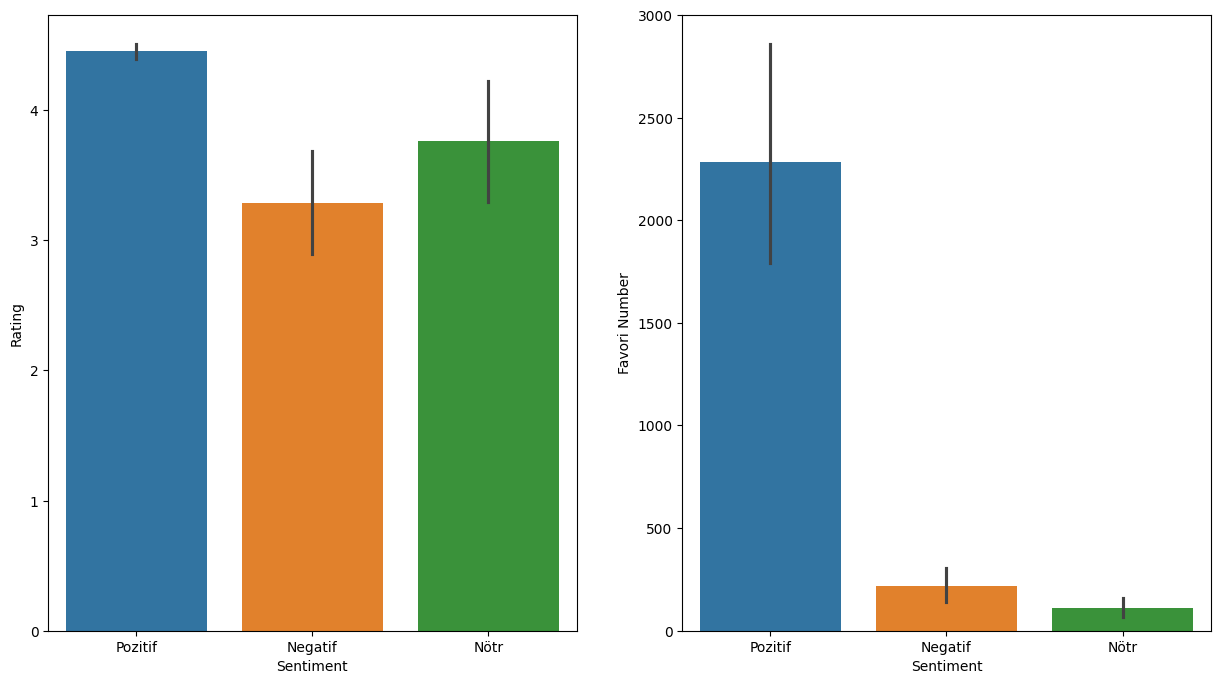

In [144]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x="Sentiment",y="Rating",hue="Sentiment",data=data,ax=ax[0])
sns.barplot(x="Sentiment",y="Favori Number",hue="Sentiment",data=data,ax=ax[1])
plt.show()


In [169]:
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score,f1_score,balanced_accuracy_score,roc_auc_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

In [235]:
dx=data[["Brand","Rating","Text","Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]]
le=LabelEncoder()
for col in dx.select_dtypes(object).columns:
    dx[col]=le.fit_transform(dx[col])
    

C:\Users\samet\AppData\Local\Temp\ipykernel_15108\2100471655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx[col]=le.fit_transform(dx[col])
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\2100471655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx[col]=le.fit_transform(dx[col])
C:\Users\samet\AppData\Local\Temp\ipykernel_15108\2100471655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [159]:
x=dx.drop("Sentiment",axis=1)
y=dx["Sentiment"]
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)

In [163]:
result={"Model":[],"F1":[],"MSE":[],"Acc":[]}
models = [
    ('LG', LogisticRegression()),
    ("SDG",SGDClassifier()),
    ("PA",PassiveAggressiveClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('HistgBM',HistGradientBoostingClassifier()),
    ('GBM',GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB',XGBRFClassifier()),
    ('XGBRF',XGBRFClassifier()),
    ("LightGBM", LGBMClassifier(verbose=-1))
]
for name,model in models:
    model.fit(x_tr,y_tr)
    y_pr=model.predict(x_ts)
    f1=f1_score(y_ts, y_pr,average='weighted')
    acc=balanced_accuracy_score(y_ts,y_pr)
    mse=mean_squared_error(y_ts,y_pr)
    result["Model"].append(name)
    result["F1"].append(f1)
    result["MSE"].append(mse)
    result["Acc"].append(acc)

Model_score=pd.DataFrame(result)
Model_score.sort_values(by="Acc",ascending=False)
        


c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model        F1       MSE       Acc
4       CART  1.000000  0.000000  1.000000
5    HistgBM  1.000000  0.000000  1.000000
6        GBM  1.000000  0.000000  1.000000
7         RF  1.000000  0.000000  1.000000
8        XGB  1.000000  0.000000  1.000000
9      XGBRF  1.000000  0.000000  1.000000
10  LightGBM  0.991560  0.008511  0.958333
0         LG  0.929090  0.080851  0.619610
1        SDG  0.831161  0.319149  0.333333
3        KNN  0.828781  0.340426  0.330128
2         PA  0.822605  0.336170  0.326923

In [167]:
np.unique(y_ts)

array([0, 1, 2])

In [315]:
def classifier_model_evalation(x_tr,x_ts,y_tr,y_ts,df,target):
    x=df.drop(target,axis=1)
    y=df[target]
    x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=42)
    result={"Model":[],"F1":[],"MSE":[],"Acc":[],"Auc":[]}
    models = [
    ('LG', LogisticRegression()),
    ("SDG",SGDClassifier()),
    ("PA",PassiveAggressiveClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('HistgBM',HistGradientBoostingClassifier()),
    ('GBM',GradientBoostingClassifier()),
    ('RF', RandomForestClassifier()),
    ('XGB',XGBRFClassifier()),
    ('XGBRF',XGBRFClassifier()),
    ("LightGBM", LGBMClassifier(verbose=-1))
]
    classes=np.unique(y_ts)
    y_ts_bin = label_binarize(y_ts, classes=classes)
    for name,model in models:
        model.fit(x_tr,y_tr)
        y_pr=model.predict(x_ts)
        f1=f1_score(y_ts, y_pr,average='weighted')
        acc=balanced_accuracy_score(y_ts,y_pr)
        mse=mean_squared_error(y_ts,y_pr)
        result["Model"].append(name)
        result["F1"].append(f1)
        result["MSE"].append(mse)
        result["Acc"].append(acc)
        y_pr_bin = label_binarize(y_pr, classes=classes)
        auc_score = roc_auc_score(y_ts_bin, y_pr_bin, average='macro', multi_class='ovr')
        result["Auc"].append(auc_score)
        
        
        plt.figure(figsize=(15, 6))

        cm = confusion_matrix(y_ts, y_pr)
        plt.subplot(1, 2, 1)
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')

        
        plt.subplot(1, 2, 2)
        for i in range(y_ts_bin.shape[1]):
            fpr, tpr, _ = roc_curve(y_ts_bin[:, i], y_pr_bin[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend(loc="lower right")
        
        plt.show()
            
    
    
    
    Model_score=pd.DataFrame(result)
    Model_score=Model_score.sort_values(by="Acc",ascending=False)
    
    
    feature_importance = Model_score["Model"][0].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    sorted_importance = feature_importance[sorted_idx]
    sorted_feature_names = x.columns[sorted_idx]

    plt.figure(figsize=(15,8))
    
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.xticks(range(len(feature_importance)), x_tr.columns, rotation=90)
    plt.title("Feature Importance Plot")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
    
    res = pd.DataFrame({"Column": sorted_feature_names, "Importance": sorted_importance})
    top_features = res.sort_values(by="Importance", ascending=False).head()
    
    return Model_score,top_features
    

c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


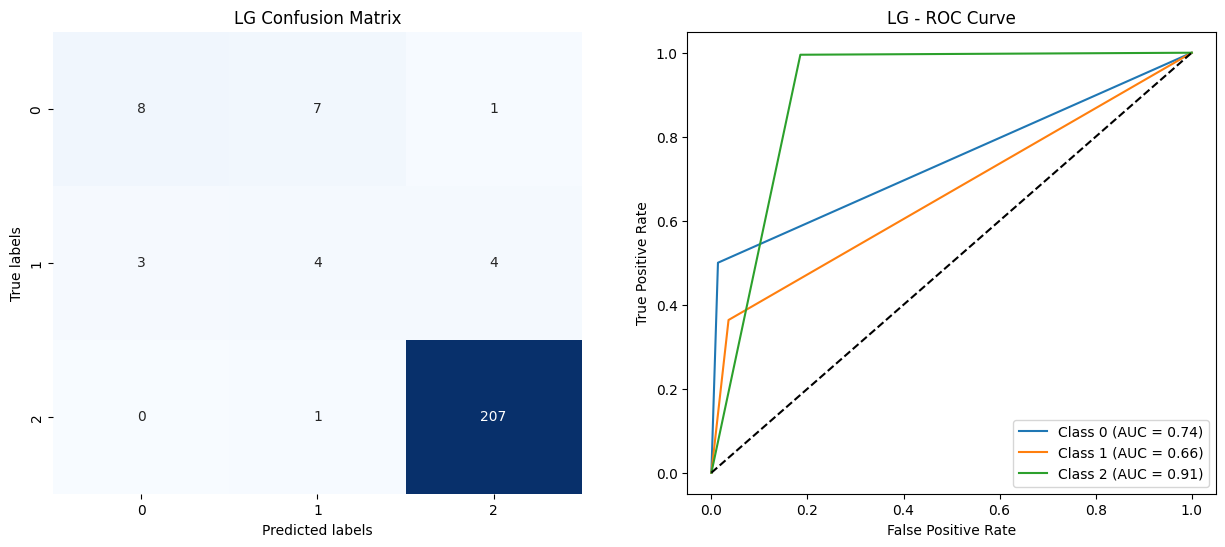

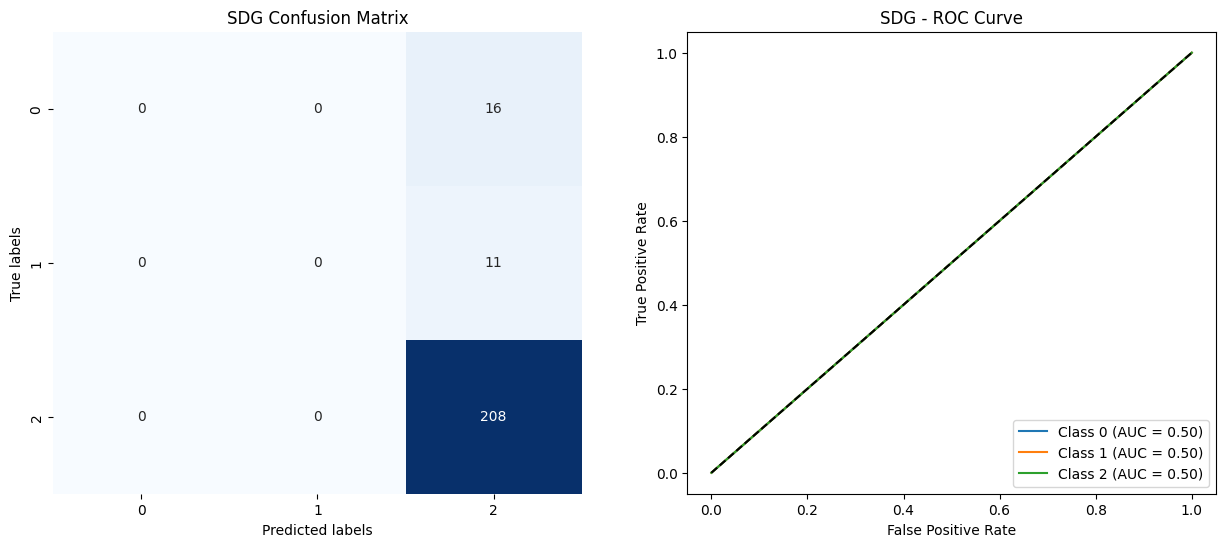

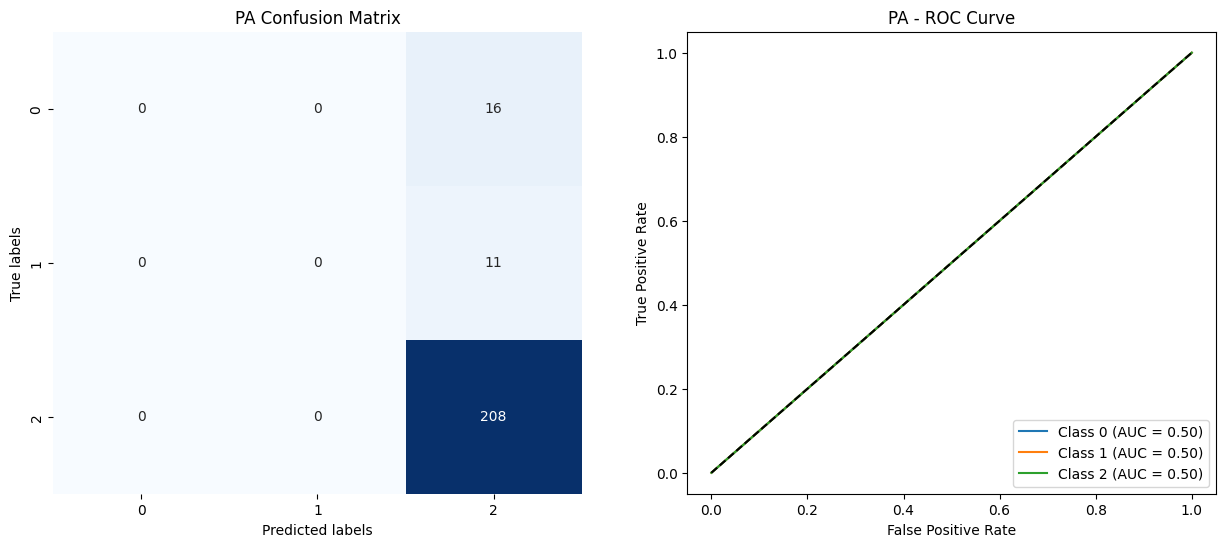

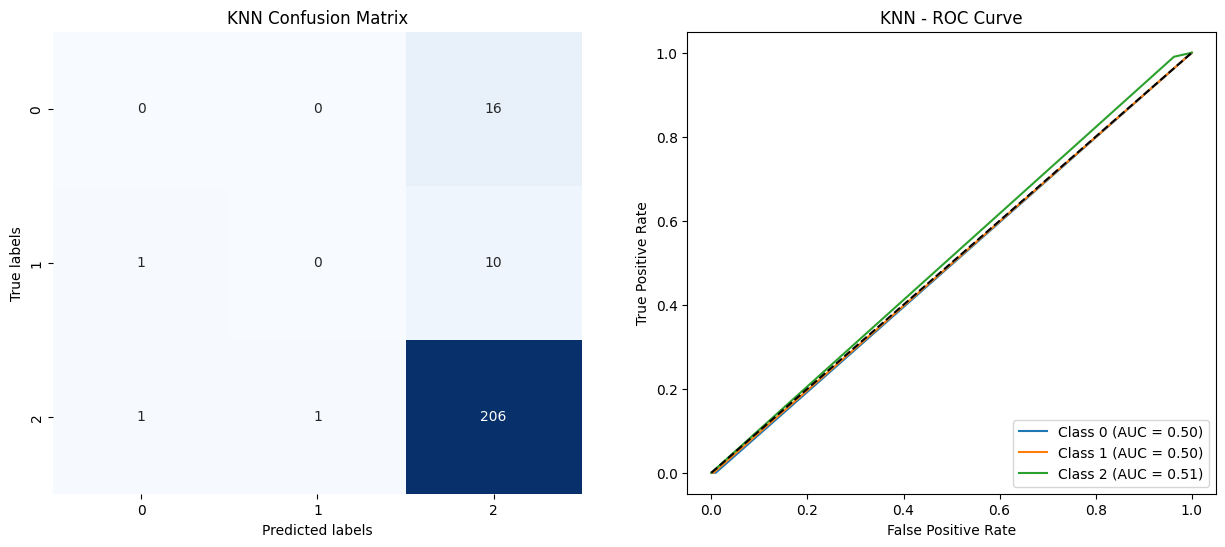

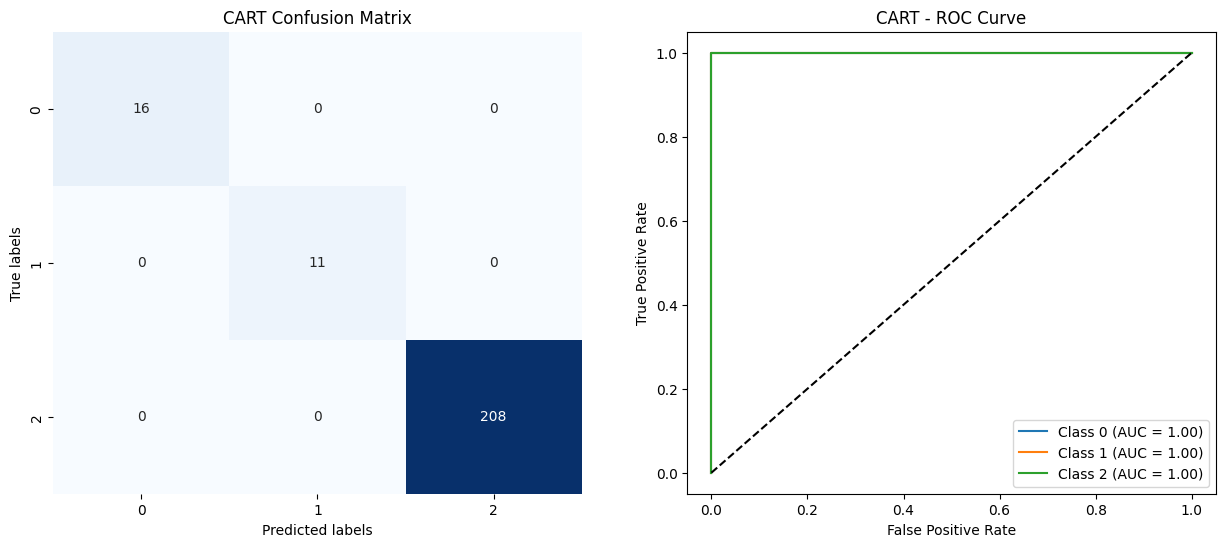

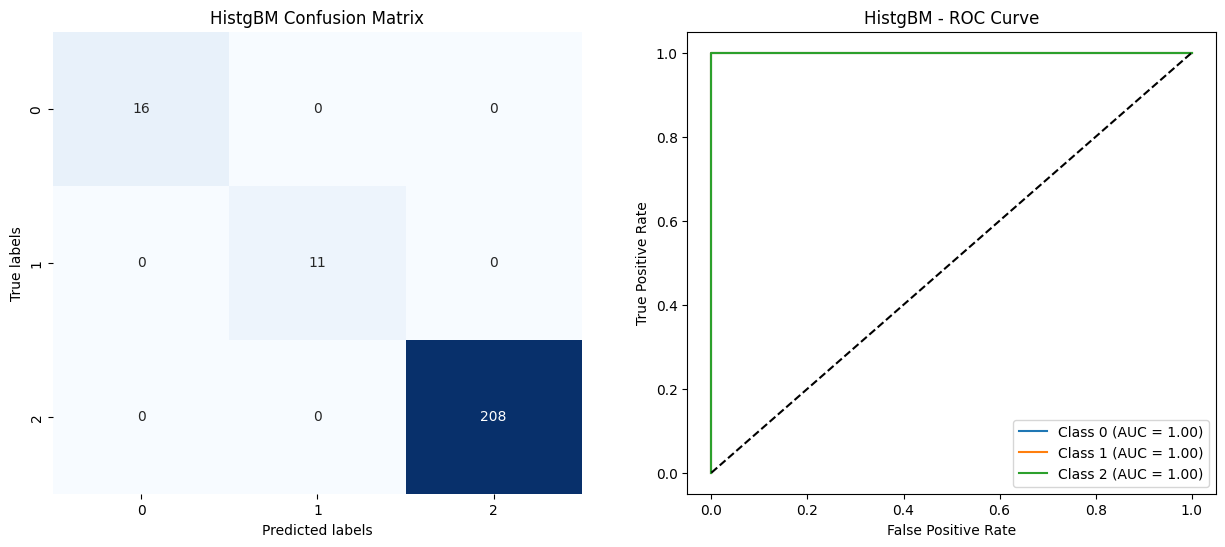

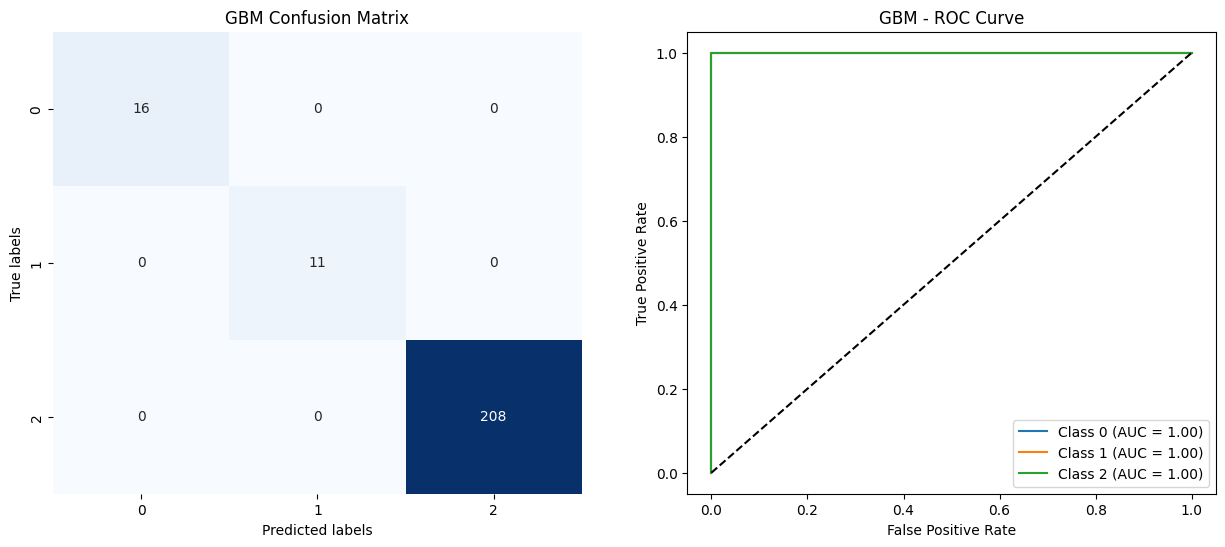

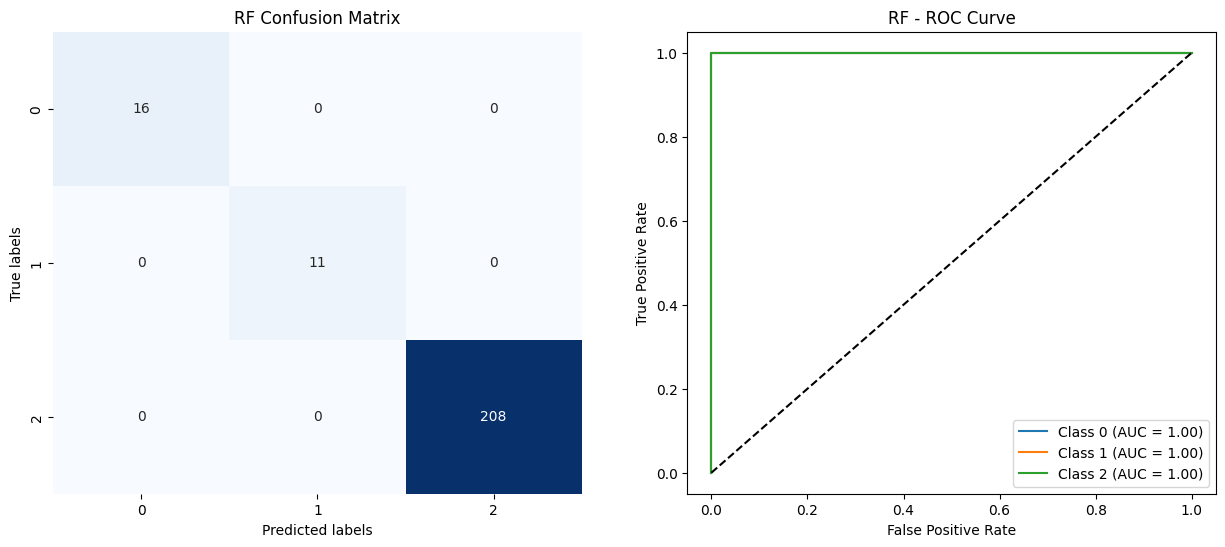

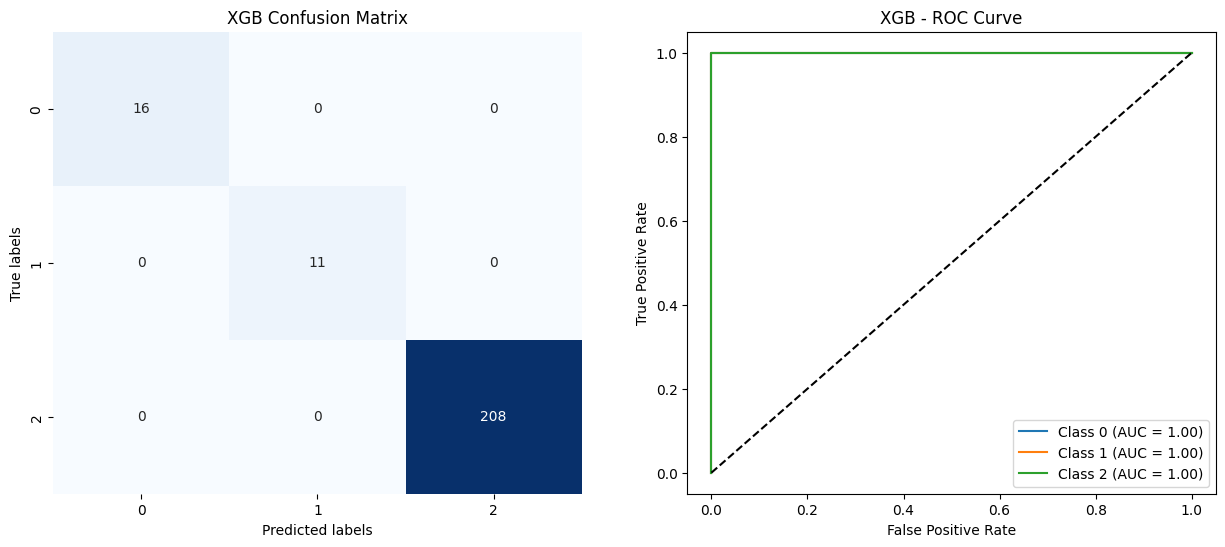

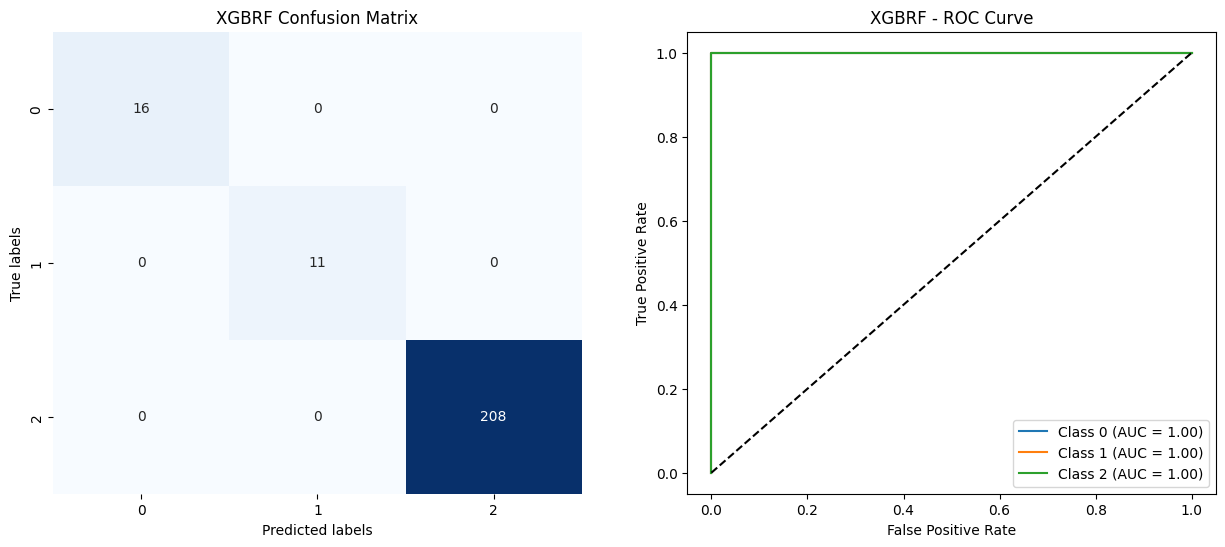

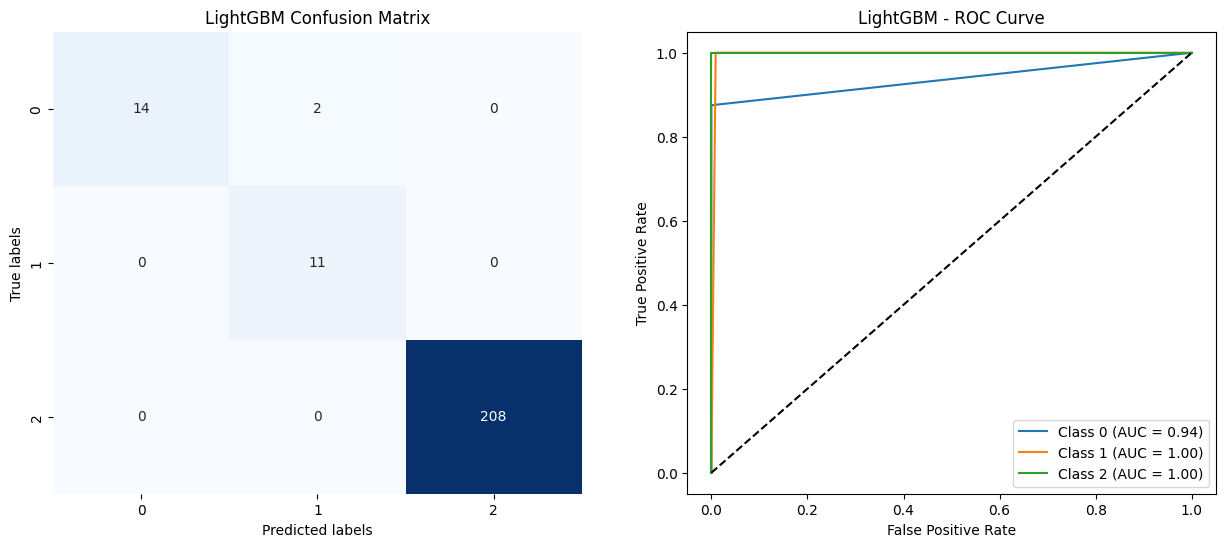

Model        F1       MSE       Acc       Auc
0         LG  0.929090  0.080851  0.619610  0.770705
1        SDG  0.831161  0.319149  0.333333  0.500000
2         PA  0.831161  0.319149  0.333333  0.500000
3        KNN  0.828781  0.340426  0.330128  0.502304
4       CART  1.000000  0.000000  1.000000  1.000000
5    HistgBM  1.000000  0.000000  1.000000  1.000000
6        GBM  1.000000  0.000000  1.000000  1.000000
7         RF  1.000000  0.000000  1.000000  1.000000
8        XGB  1.000000  0.000000  1.000000  1.000000
9      XGBRF  1.000000  0.000000  1.000000  1.000000
10  LightGBM  0.991560  0.008511  0.958333  0.977679

In [176]:
classifier_model_evalation(x_tr,x_ts,y_tr,y_ts,dx,"Sentiment")

Overfitting Control

In [177]:
def check_overfitting(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"üîπ Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")
    print(f"üîπ Train F1-score: {train_f1:.4f} | Test F1-score: {test_f1:.4f}")

    
    acc_diff = train_acc - test_acc
    f1_diff = train_f1 - test_f1

    if acc_diff > 0.10 or f1_diff > 0.10:  # %10'dan fazla fark varsa Overfitting riski var
        print("‚ö†Ô∏è Model overfitting yapƒ±yor olabilir!")
    else:
        print("‚úÖ Model iyi genelleme yapƒ±yor.")

    return train_acc, test_acc, train_f1, test_f1


In [308]:
def plot_overfitting_graph(train_scores, test_scores, metric_name="Score"):
    epochs = range(1, len(train_scores) + 1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_scores, 'bo-', label='Train ' + metric_name)
    plt.plot(epochs, test_scores, 'ro-', label='Test ' + metric_name)
    plt.xlabel('Epochs / Iterations')
    plt.ylabel(metric_name)
    plt.title(f'Training vs Testing {metric_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [181]:
train_acc, test_acc, train_f1, test_f1=check_overfitting(RandomForestClassifier(),x_tr,x_ts,y_tr,y_ts)

üîπ Train Accuracy: 1.0000 | Test Accuracy: 1.0000
üîπ Train F1-score: 1.0000 | Test F1-score: 1.0000
‚úÖ Model iyi genelleme yapƒ±yor.


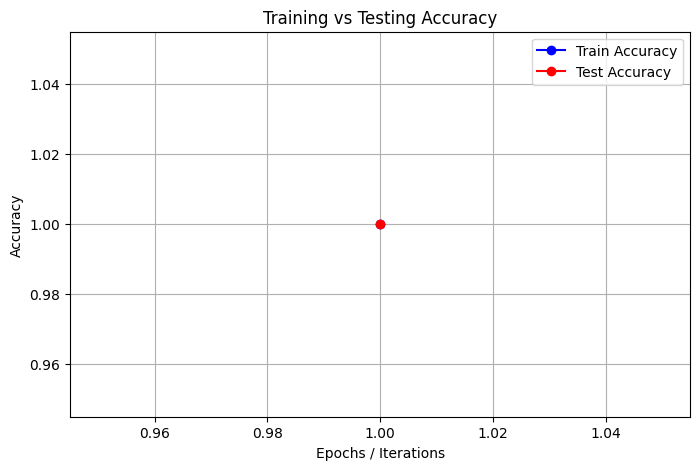

In [182]:
plot_overfitting_graph([train_acc],[test_acc],metric_name="Accuracy")

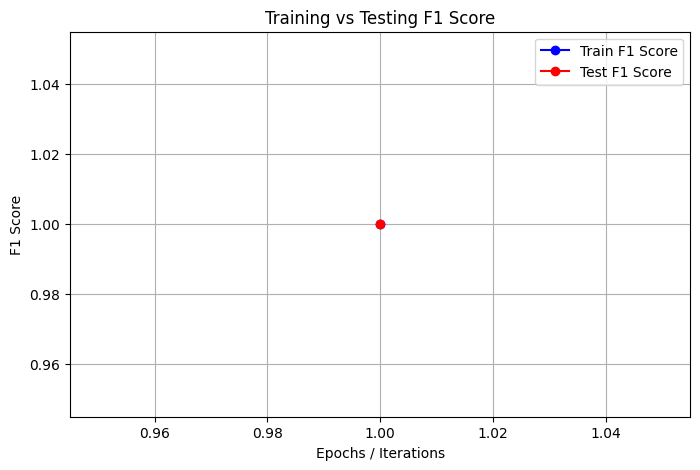

In [184]:
plot_overfitting_graph([train_f1],[test_f1],metric_name="F1 Score")

In [189]:
dx=data[["Brand","Price","Rating","Text","Translated Text","Negatif","Notr","Positif","Compound","Sentiment"]]

In [190]:
dx.groupby(["Sentiment"])["Price"].mean().reset_index().sort_values(by="Price",ascending=False)

Sentiment         Price
0   Negatif  35970.893016
2   Pozitif  33611.582609
1      N√∂tr  33344.706458

Filled No comment Data

In [292]:
for val in df[df["Text"]=="yorum yoktur"]["Rating"].values:
    if 3.9< val < 5.1:
        df.loc[(df["Text"]=="yorum yoktur")&(df["Rating"]==val),"Sentiment"]="Pozitif"
    elif 2.9< val <3.9:
        df.loc[(df["Text"]=="yorum yoktur")&(df["Rating"]==val),"Sentiment"]="N√∂tr"
    else:
        df.loc[(df["Text"]=="yorum yoktur")&(df["Rating"]==val),"Sentiment"]="Negatif"

In [293]:
df

Brand                                              Model     Price  \
0     CASPER  Nirvana C370.4020-4C00B Intel Celeron N4020 4G...   8750.00   
1     LENOVO  NB V15 82YU0123TX RYZEN5-7520U 16GB 512SSD O/B...  13499.00   
2     Zeiron  Zgx25 Ryzen 5 3600 32GB 3200MHz Ram 512GB SSD ...  18299.00   
3     LENOVO  IdeaPad3 Intel Core i3-1215U 8GB 256GB SSD 15....  11005.00   
4       ASUS  Vivobook 15 Intel Core i5-1235U 8GB 512GB SSD ...  15498.00   
...      ...                                                ...       ...   
2788  LENOVO  Ryzen 7 Pro 5850u 48gb 2tb Ssd 14" W11p 20xls3...  43399.00   
2789      HP  24GB 4TB SSD RTX4070/8GB 144HZ 16.1" FHD FDOS ...  75716.13   
2790      HP  64GB 256GB SSD 15.6" FHD W11PRO 6S6Z1EA & PER4...  39655.09   
2791  LENOVO  V15 G3 Intel Core I7-1255U 24 GB 1 TBSSD FREED...  24464.30   
2792      HP  64gb 512gb Ssd 15.6 Fhd Windows11pro Ta≈üƒ±nabil...  24999.99   

      Favori Number  Rating  \
0           60500.0     4.2   
1           18500.0     4.5   
2           30300.0     4.6   
3            4354.0     3.8   
4            7974.0     4.5   
...             ...     ...   
2788            0.0     0.0   
2789            0.0     0.0   
2790            0.0     0.0   
2791            0.0     5.0   
2792            0.0     0.0   

                                                   Text  \
0     daha √ßok yeni olduƒüu i√ßin performansƒ±na dair y...   
1     √ßok begendim ikincisini sipari≈ü verecem tavsiy...   
2     oƒülum i√ßin aldƒ±m harika bir √ºr√ºn tavsiye ederi...   
3     sorunsuz geldi te≈üekk√ºr ederim satƒ±cƒ±ya karne ...   
4     kƒ±zƒ±ma aldƒ±m √ßok memnun 12 ya≈üƒ±ndaki ortaokula...   
...                                                 ...   
2788                                       yorum yoktur   
2789                                       yorum yoktur   
2790                                       yorum yoktur   
2791                                       yorum yoktur   
2792                                       yorum yoktur   

                                        Translated Text  Negatif   Notr  \
0     I can not comment on the performance of more n...    0.014  0.691   
1     I would like to order the latter.I have resear...    0.003  0.740   
2     I bought a great product for my son I recommen...    0.010  0.686   
3     Thank you. I bought it as a report card gift t...    0.047  0.733   
4     I bought my daughter very satisfied 12 -year -...    0.045  0.651   
...                                                 ...      ...    ...   
2788                                         NO COMMENT    0.000  1.000   
2789                                         NO COMMENT    0.000  1.000   
2790                                         NO COMMENT    0.000  1.000   
2791                                         NO COMMENT    0.000  1.000   
2792                                         NO COMMENT    0.000  1.000   

      Positif  Compound Sentiment  
0       0.295    0.9988   Pozitif  
1       0.257    0.9993   Pozitif  
2       0.304    0.9996   Pozitif  
3       0.220    0.9959   Pozitif  
4       0.304    0.9992   Pozitif  
...       ...       ...       ...  
2788    0.000    0.0000   Negatif  
2789    0.000    0.0000   Negatif  
2790    0.000    0.0000   Negatif  
2791    0.000    0.0000   Pozitif  
2792    0.000    0.0000   Negatif  

[2793 rows x 12 columns]

In [295]:
for col in df.select_dtypes(object).columns:
    df[col]=le.fit_transform(df[col])


In [296]:
df

Brand  Model     Price  Favori Number  Rating  Text  Translated Text  \
0         5   1757   8750.00        60500.0     4.2   127              243   
1        24   1712  13499.00        18500.0     4.5   645              412   
2        42   2500  18299.00        30300.0     4.6   475              187   
3        24   1346  11005.00         4354.0     3.8   548              633   
4         1   2354  15498.00         7974.0     4.5   413              227   
...     ...    ...       ...            ...     ...   ...              ...   
2788     24   2003  43399.00            0.0     0.0   634              497   
2789     15    261  75716.13            0.0     0.0   634              497   
2790     15    520  39655.09            0.0     0.0   634              497   
2791     24   2255  24464.30            0.0     5.0   634              497   
2792     15    534  24999.99            0.0     0.0   634              497   

      Negatif   Notr  Positif  Compound  Sentiment  
0       0.014  0.691    0.295    0.9988          2  
1       0.003  0.740    0.257    0.9993          2  
2       0.010  0.686    0.304    0.9996          2  
3       0.047  0.733    0.220    0.9959          2  
4       0.045  0.651    0.304    0.9992          2  
...       ...    ...      ...       ...        ...  
2788    0.000  1.000    0.000    0.0000          0  
2789    0.000  1.000    0.000    0.0000          0  
2790    0.000  1.000    0.000    0.0000          0  
2791    0.000  1.000    0.000    0.0000          2  
2792    0.000  1.000    0.000    0.0000          0  

[2793 rows x 12 columns]

c:\Users\samet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


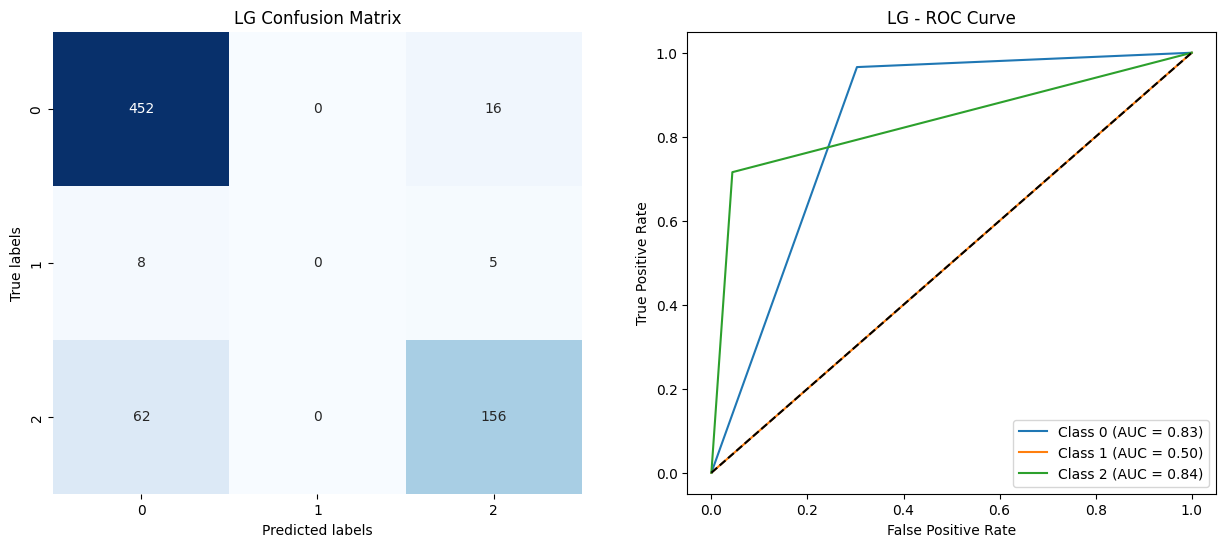

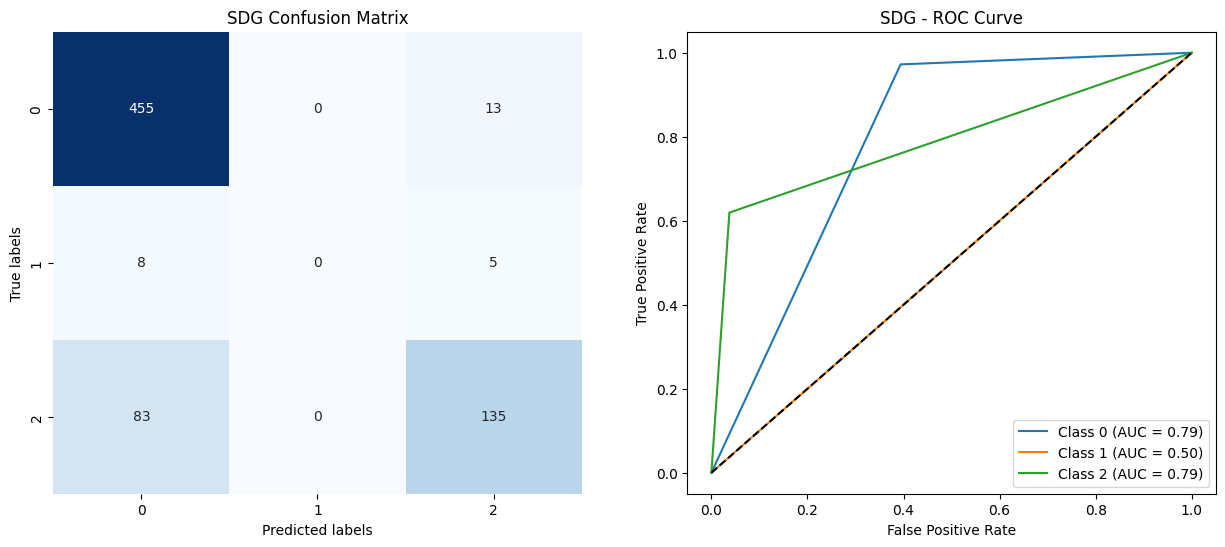

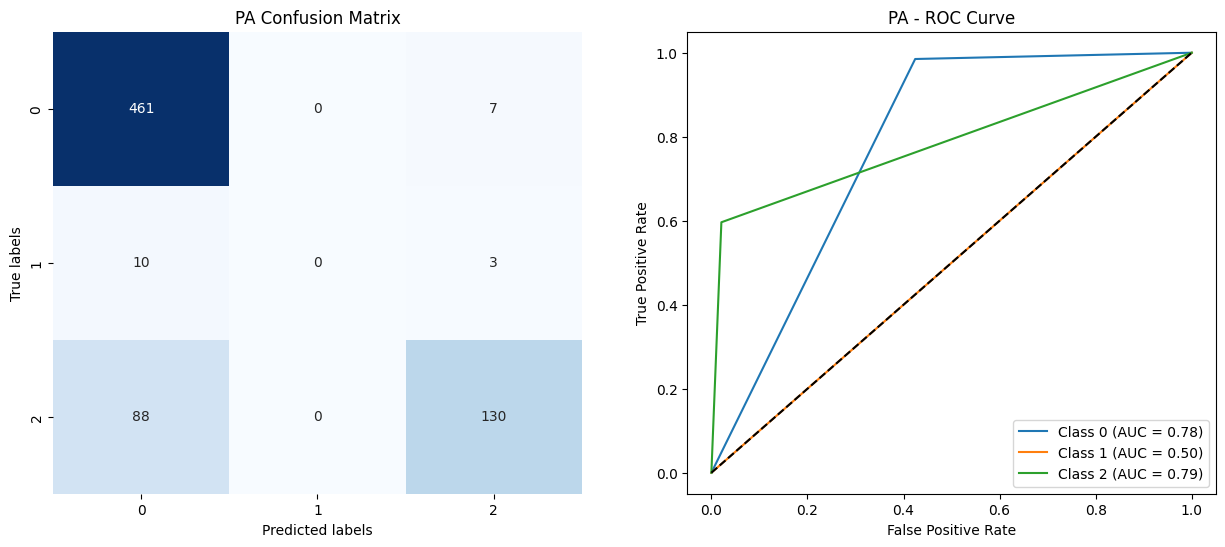

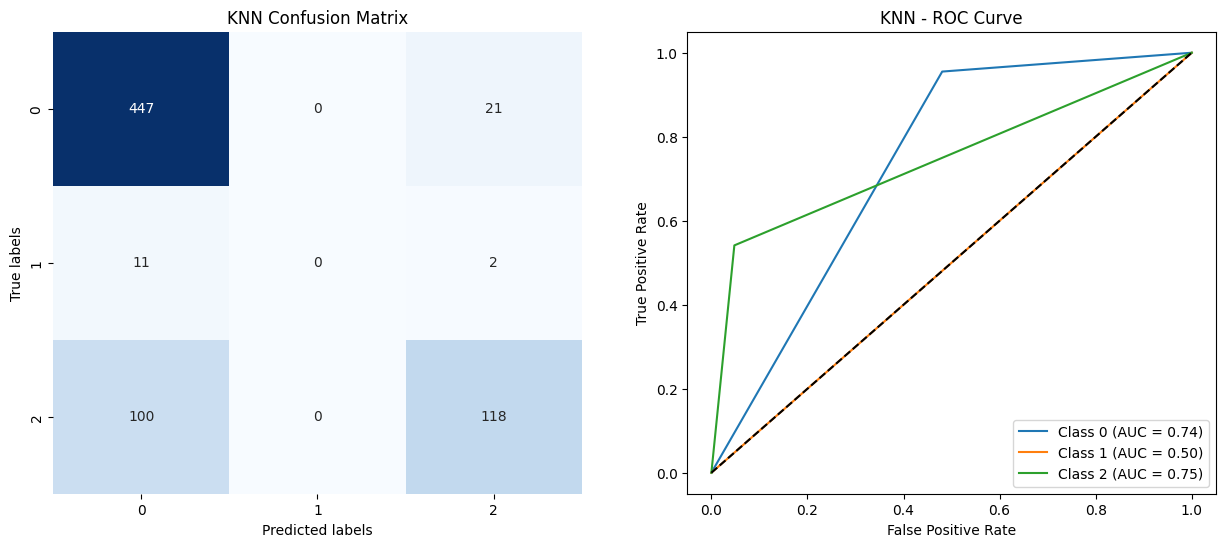

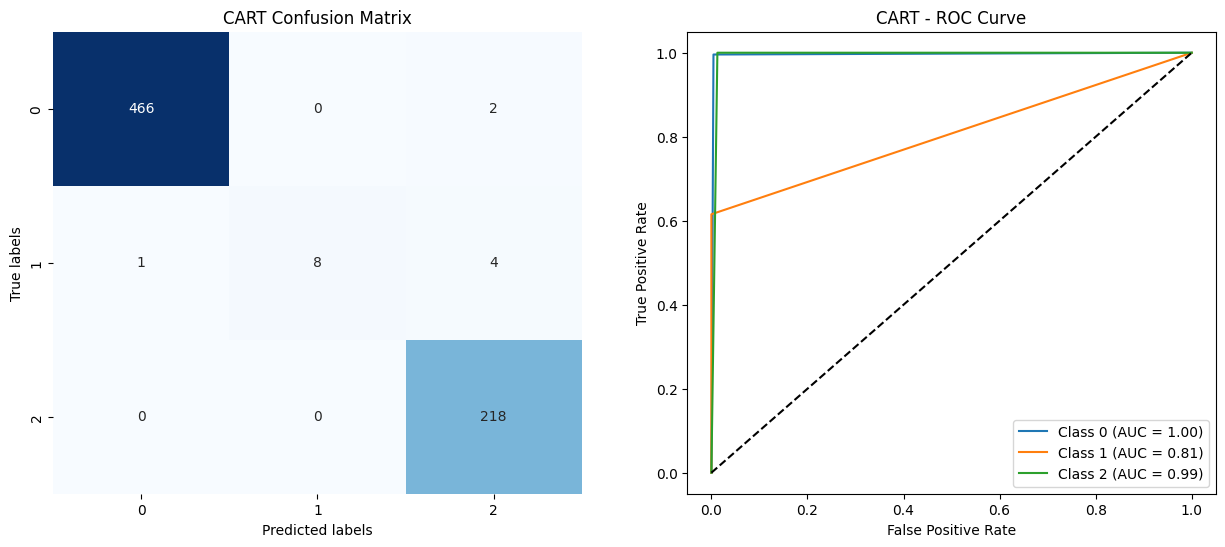

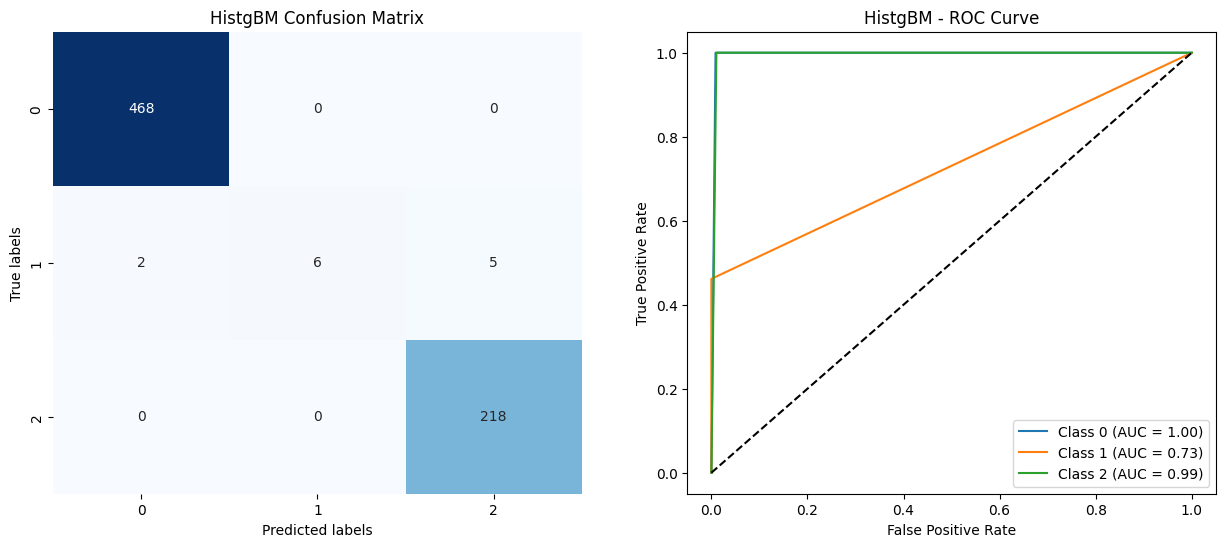

In [ ]:
classifier_model_evalation(x_tr,x_ts,y_tr,y_ts,df,"Sentiment")

In [302]:
train_acc, test_acc, train_f1, test_f1=check_overfitting(DecisionTreeClassifier(),x_tr,x_ts,y_tr,y_ts)

üîπ Train Accuracy: 1.0000 | Test Accuracy: 0.9385
üîπ Train F1-score: 1.0000 | Test F1-score: 0.9381
‚úÖ Model iyi genelleme yapƒ±yor.


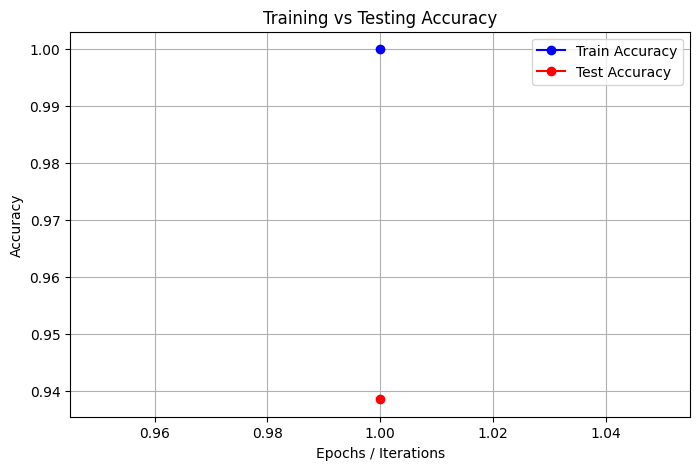

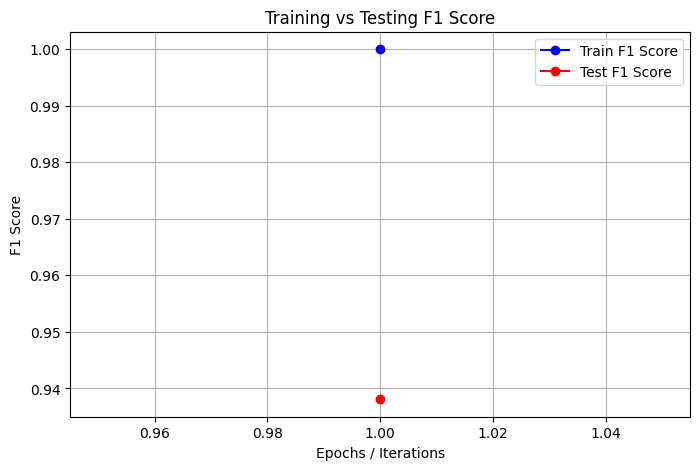

In [ ]:
plot_overfitting_graph([train_acc], [test_acc], metric_name="Accuracy")
plot_overfitting_graph([train_f1], [test_f1], metric_name="F1 Score")